# An Investigation of Sorting Algorithms

**Notes:** 
* It is recommended that you 'Restart and Run All' before you begin as many code cells are dependent on previous code cells.
* Results are stored in pandas DataFrames. Running **bench_all()** or **bench_run10()** more than once, will put duplicate data in pandas DataFrames.

### Libraries

In [1]:
import numpy as np # For randomly generating numbers
import pandas as pd #For generating dataframes and plots for same
import time

## Introduction

In the course of this investigation, I will discuss and benchmark the following sorting algorithms:
* Bubble Sort
* Insertion Sort
* Merge Sort
* Bucket Sort
* Tim Sort

## Generating Random Data

In [2]:
def rand(n):
    array = []
    for i in range(0, n, 1): # for every integer between 1 and n
        gen_rand= np.random.randint(0, 100) # generate a random number
        array.append(gen_rand) # and add it to the array
    return array

## Simple Comparison Based Algorithms - Bubble Sort vs. Insertion Sort

### Bubble Sort

In [3]:
def bubbleSort(alist):
    start = time.time()
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
    end = time.time()
    return round(((end - start)*1000), 3)
                
# Reference: interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html

In [4]:
%timeit(bubbleSort)

36.4 ns ± 0.532 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [5]:
bubbleSort(rand(10)) #10 random variables

0.0

In [6]:
bubbleSort(rand(10000)) #10,000

16623.211

### Insertion Sort

In [7]:
def binary_search(the_array, item, start, end):
    if start == end:
        if the_array[start] > item:
            return start
        else:
            return start + 1
    if start > end:
        return start

    mid = round((start + end)/ 2)

    if the_array[mid] < item:
        return binary_search(the_array, item, mid + 1, end)

    elif the_array[mid] > item:
        return binary_search(the_array, item, start, mid - 1)

    else:
        return mid

In [8]:
def insertionSort(the_array):
    start = time.time()          
    l = len(the_array)
    for index in range(1, l):
        value = the_array[index]
        pos = binary_search(the_array, value, 0, index - 1)
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
    end = time.time()
    return round(((end - start)*1000), 3) #Return time in milliseconds

#Reference:http://interactivepython.org/courselib/static/pythonds/SortSearch/TheInsertionSort.html
#Reference:http://skerritt.tech/blog/timsort/

In [9]:
%timeit(insertionSort)

38.3 ns ± 0.621 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [10]:
insertionSort(rand(10)) #10 random variables

0.0

In [11]:
insertionSort(rand(10000)) #10,000 random variables

1330.337

## An Efficient Comparison Based Sorting Algorithm - Merge Sort

In [12]:
def mergeSort(alist):
    start = time.time()
   
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1 
    end = time.time()
    return round(((end - start)*1000), 3)
#Reference: http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html 

In [13]:
%timeit(mergeSort)

41.3 ns ± 1.01 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [14]:
mergeSort(rand(10)) #10 random variables

0.0

In [15]:
mergeSort(rand(10000)) #10,000 random variables

124.031

In [16]:
mergeSort(rand(100000))

1505.381

## Bucket Sort

In [17]:
def insertion_sort(the_array):
    l = len(the_array)
    for index in range(1, l):
        value = the_array[index]
        pos = binary_search(the_array, value, 0, index - 1)
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
    the_array

In [18]:
def bucketSort(alist):
    start = time.time()
    largest = max(alist)
    length = len(alist)
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertion_sort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]

    end = time.time()
    return round(((end - start)*1000), 3)
#Reference: https://www.sanfoundry.com/python-program-implement-bucket-sort/

In [19]:
%timeit(bucketSort)

40.1 ns ± 2.58 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [20]:
bucketSort(rand(10))

0.0

In [21]:
bucketSort(rand(100000))

32268.181

## TimSort

In [22]:
def merge(left, right): #Input is two sorted lists
    if not left:
        return right
    if not right:
        return left
    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])

In [23]:
def timSort(the_array):
    start = time.time()
    runs, sorted_runs = [], []
    length = len(the_array)
    new_run = [the_array[0]]

    # for every i in the range of 1 to length of array
    for i in range(1, length):
        # if i is at the end of the list
        if i == length - 1:
            new_run.append(the_array[i])
            runs.append(new_run)
            break
        # if the i'th element of the array is less than the one before it
        if the_array[i] < the_array[i-1]:
            # if new_run is set to None (NULL)
            if not new_run:
                runs.append([the_array[i]])
                new_run.append(the_array[i])
            else:
                runs.append(new_run)
                new_run = []
        # else if its equal to or more than
        else:
            new_run.append(the_array[i])

    # for every item in runs, append it using insertion sort
    for item in runs:
        sorted_runs.append(insertion_sort(item))
    
    # for every run in sorted_runs, merge them
    sorted_array = []
    for run in sorted_runs:
        sorted_array = merge(sorted_array, run)

    end = time.time()
    return round(((end - start)*1000), 3)

In [24]:
%timeit(timSort)

62 ns ± 4.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [25]:
timSort(rand(100000))


183.047

## Benchmarking Functions

In [26]:
#Passes multiple randomly generated arrays to only 1 function
def bench(func):
    array_1 = []
    array_2 =[]
    # Rand_size = input size of randomly generated datasets
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    for i in rand_size:
            y = func(rand(i)) #Pass each randomly generated dataset through the function
            x = i #Set x equal to the size
            array_1.append(x) #Add x values to array 1 
            array_2.append(y) #Add y values to array 2
       
    d = {'Input Size': array_1, 'Time Elapsed': array_2} #Generate df with data
    df = pd.DataFrame(data=d);
    graph = df.plot(x='Input Size',y='Time Elapsed');
    display(df, graph);

In [40]:
# Passes 10 unique and randomly generated arrays to 5 functions
def bench_all(func, func2, func3, func4, func5):
    
    array_1 = []
    array_2 = []
    array_3 = []
    array_4 = []
    array_5 = []
    array_6 = []
    # Rand_size = input size of randomly generated datasets
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    
    for i in rand_size:
            y = func(rand(i)) #Pass 10 randomly generated dataset through each function
            y1 = func2(rand(i))
            y2 = func3(rand(i))
            y3 = func4(rand(i))
            y4 = func5(rand(i))
            x = i #Set x equal to the size
    
            array_1.append(x) #Add x values to array 1 
            array_2.append(y) #Add y values to their arrays
            array_3.append(y1)
            array_4.append(y2)
            array_5.append(y3)
            array_6.append(y4)
    global df        
    temp_df = pd.DataFrame({'Input Size': array_1, 'BubbleSort': array_2, 'InsertionSort': array_3, 'MergeSort': array_4, 
                             'BucketSort': array_5, 'TimSort':array_6})
    df = df.append(temp_df, ignore_index=True)
  


## Comparing Sorting Algorithms 

In [48]:
df = pd.DataFrame()
# Create an empty DataFrame
# Alternatively if you're rerunning bench_all(), run this cell first to empty df

In [49]:
bench_all(bubbleSort, insertionSort, mergeSort, bucketSort, timSort)

In [50]:
df

,Input Size,BubbleSort,InsertionSort,MergeSort,BucketSort,TimSort
0,10,0.000,0.000,1.000,0.000,0.000
1,50,0.000,0.000,0.999,0.000,0.000
2,100,1.000,1.000,1.999,0.000,0.000
3,250,10.005,4.002,2.998,2.001,0.000
4,500,51.010,9.007,6.000,3.002,0.999
5,750,122.032,21.006,9.002,4.004,1.999
6,1000,186.046,23.007,10.007,6.999,2.002
7,5000,4008.016,373.098,57.014,78.019,7.002
8,7500,9605.435,790.200,89.025,216.055,10.003
9,10000,16972.301,1367.348,123.031,326.082,14.004


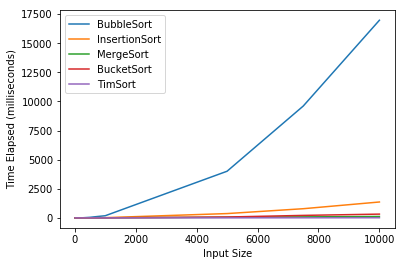

In [53]:
ax = df.plot(x='Input Size', y=['BubbleSort', 'InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

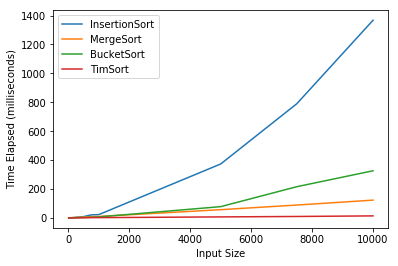

In [54]:
ax = df.plot(x='Input Size', y=['InsertionSort', 'MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

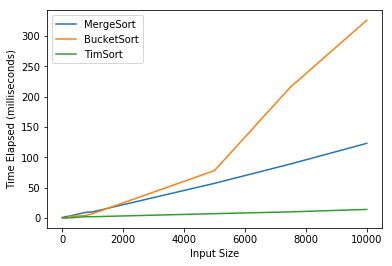

In [55]:
ax = df.plot(x='Input Size', y=['MergeSort', 'BucketSort', 'TimSort'])
ax.set_ylabel("Time Elapsed (milliseconds)");

## Benchmarking Sorting Algorithms

In [56]:
df2 = pd.DataFrame()